#  Calibration Image Master Creation notebook

This notebook calibrates Bias images, Dark images and Flat images and combines them into their respective Master files

Made by: Harlan Shaw <harlan.shaw@ucalgary.ca>

## Required Python packages:
[Astropy](https://www.astropy.org/)

[CCDProc](https://ccdproc.readthedocs.io/en/latest/index.html)

[Astro-SCRAPPY](https://github.com/astropy/astroscrappy)

It's recommended you download and install [Anaconda](https://www.anaconda.com/products/individual#Downloads) as this contains a Python environment and Astropy.

You will need to install CCDProc using the Conda install command: `conda install -c conda-forge ccdproc`

This will also install Astropy and Astro-SCRAPPY if not already installed.

## Citations:
With the projects used above, any use of this notebook requires the citations of the Python packages and papers from which they are derived. 
Their citations are located here:

[Astropy](https://www.astropy.org/acknowledging.html)

[CCDProc](https://ccdproc.readthedocs.io/en/latest/citation.html)

[Astro-SCRAPPY](https://github.com/astropy/astroscrappy)



## How to Use

It's recommended you click "Run All Cells" to run this notebook, but you may optionally run each cell individually.

This notebook requires the location of your raw bias images as either a full location or as a relative path if you have the bias images in the folder that this notebook is located in.

Example:

Full location: C:\path\to\bias

Relative: path\to\bias



# Setup

All variables are set up in this cell. If this cell is not run, the program will not run.

In [2]:
from pathlib import Path
from astropy.nddata import CCDData
from astropy.stats import mad_std
from astropy.units import adu, second
from ccdproc import ImageFileCollection, combine, subtract_bias, subtract_dark, cosmicray_lacosmic
import matplotlib.pyplot as plt
import numpy as np


GIGABYTE = 1e9 # 1 billion bytes
MEMORY_LIMIT = 4*GIGABYTE

data_directory = Path(".") # directory that notebooks are in.
reduced_path = data_directory.joinpath("reduced")
reduced_path.mkdir(exist_ok=True)


# Stage 1: Bias

During this stage the master Bias is made, it is integral to the rest of the process and must be done first.

In [2]:
biases = ImageFileCollection(data_directory, glob_include="*bias*.fit*")

combined_bias = combine(biases.files, 
                        method="average", 
                        sigma_clip=True, 
                        sigma_clip_low_thresh=5, 
                        sigma_clip_high_thresh=5, 
                        sigma_clip_func=np.ma.median, 
                        sigma_clip_dev_func=mad_std,
                        mem_limit = MEMORY_LIMIT,
                        unit=adu)
combined_bias.meta["IMAGETYP"] = "Bias"
combined_bias.meta['combined'] = True
combined_bias.meta['HISTORY'] = f"Combined {len(biases.files)} images by Mean"

combined_bias.write(reduced_path / "combined_bias.fit")

INFO:astropy:splitting each image into 178 chunks to limit memory usage to 1000000000.0 bytes.


INFO: splitting each image into 178 chunks to limit memory usage to 1000000000.0 bytes. [ccdproc.combiner]



# Stage 2: Dark

Here the master Dark is made. This process requires the use of the master Bias, so Stage 1 must be run first

In [3]:
darks = ImageFileCollection(data_directory, glob_include="*dark*.fit*")

# Calibration
calibrated_darks_path = data_directory.joinpath("bias_removed_darks")
calibrated_darks_path.mkdir(exist_ok=True)

for dark in darks.files:
    dark = Path(dark)
    dark_ccd = CCDData.read(dark, unit=adu)
    try: 
        dark_ccd = subtract_bias(dark_ccd, combined_bias)
    except:
        combined_bias = reduced_path.joinpath("combined_bias.fit")
        combined_bias = CCDData.read(combined_bias)
        dark_ccd = subtract_bias(dark_ccd, combined_bias)
    dark_ccd.meta["HISTORY"] = f"Subtracted master bias combined_bias.fit"
    dark_ccd.write(calibrated_darks_path.joinpath(dark))
    
calibrated_darks = ImageFileCollection(calibrated_darks_path, glob_include="*dark*.fit*")
combined_dark = combine(calibrated_darks.files, 
                        method="average", 
                        sigma_clip=True, 
                        sigma_clip_low_thresh=5, 
                        sigma_clip_high_thresh=5, 
                        sigma_clip_func=np.ma.median, 
                        sigma_clip_dev_func=mad_std,
                        mem_limit = MEMORY_LIMIT,
                        unit=adu)
combined_dark.meta["IMAGETYP"] = "Dark"
combined_dark.meta['combined'] = True
combined_dark.meta['HISTORY'] = f"Combined {len(darks.files)} images by Mean"

combined_dark.write(reduced_path / "combined_dark.fit")

C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.487627 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59451.253692 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.487789 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.488171 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.488333 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:

INFO: splitting each image into 8 chunks to limit memory usage to 4000000000.0 bytes. [ccdproc.combiner]


C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.487789 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.488171 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.488333 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.488530 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58690.488692 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:


# Stage 3: Flat

Here the master Flat is made. This process requires the use of the master Bias and master Dark, so Stage 1 and 2 must be run first

In [5]:
def inv_average(data):
    return 1/np.average(data)

def inv_median(data):
    return 1/np.median(data)

flats = ImageFileCollection(data_directory, glob_include="*flat*.fit*")

# Calibration
calibrated_flats_path = data_directory.joinpath("bias_dark_removed_flats")
calibrated_flats_path.mkdir(exist_ok=True)


for flat in flats.files:
    flat = Path(flat)
    flat_ccd = CCDData.read(flat, unit=adu)
    try: 
        flat_ccd = subtract_bias(flat_ccd, combined_bias)
    except:
        combined_bias = reduced_path.joinpath("combined_bias.fit")
        combined_bias = CCDData.read(combined_bias)
        flat_ccd = subtract_bias(flat_ccd, combined_bias)
    try: 
        flat_ccd = subtract_dark(ccd=flat_ccd, master=combined_dark, exposure_time="EXPTIME", exposure_unit=second, scale=False)
    except:
        combined_dark = reduced_path.joinpath("combined_dark.fit")
        combined_dark = CCDData.read(combined_dark)
        flat_ccd = subtract_dark(ccd=flat_ccd, master=combined_dark, exposure_time="EXPTIME", exposure_unit=second, scale=False)
    flat_cdd = cosmicray_lacosmic(ccd=flat_ccd, gain=1.42, readnoise=15.1, cleantype="median", gain_apply=False)
    flat_ccd.meta["HISTORY"] = f"Subtracted master bias combined_bias.fit"
    flat_ccd.meta["HISTORY"] = f"Subtracted master dark combined_dark.fit"
    flat_ccd.meta["HISTORY"] = f"Removed Cosmic rays with Median Filter"
    flat_ccd.write(calibrated_flats_path.joinpath(flat))
    
calibrated_flats = ImageFileCollection(calibrated_flats_path, glob_include="*flat*.fit*")
combined_flat = combine(calibrated_flats.files, 
                        method="average", 
                        sigma_clip=True, 
                        sigma_clip_low_thresh=5, 
                        sigma_clip_high_thresh=5, 
                        sigma_clip_func=np.ma.median, 
                        sigma_clip_dev_func=mad_std,
                        mem_limit = MEMORY_LIMIT,
                        scale=inv_median,
                        unit=adu)
combined_flat.meta["IMAGETYP"] = "Flat"
combined_flat.meta['combined'] = True
combined_flat.meta['HISTORY'] = f"Combined {len(flats.files)} images by Mean"

combined_flat.write(reduced_path / "combined_flat.fit")

C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.183368 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.183634 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.183889 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.184155 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.184421 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:

INFO: splitting each image into 6 chunks to limit memory usage to 4000000000.0 bytes. [ccdproc.combiner]


C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.183634 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.183889 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.184155 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.184421 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:707: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 58686.184687 from DATE-OBS'.
  warnings.warn(
C:\Users\harla\anaconda3\envs\install\lib\site-packages\astropy\wcs\wcs.py:

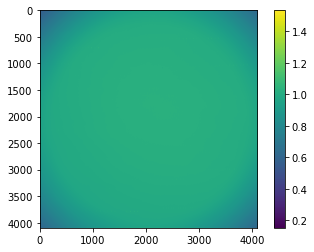

In [7]:
plt.imshow(combined_flat.data)
plt.colorbar()